<a href="https://colab.research.google.com/github/hdpark1208/StudyCode/blob/main/3)%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***2-2 데이터 전처리***


# **줄거리**




1.   넘파이를 이용해 세련되게 생선 데이터와 타겟 테이터를 만든다

2.   사이킷런을 이용해 세련되게 훈련, 테스트 세트를 나눈다

3.   나눈 세트를 가지고 훈련시킨다.

4.   수상한 도미 한 마리. 예측이 실패한 이유를 생각해본다

5.   수상한 도미의 데이터를 넣고 그래프를 그려본다

6.   수상한 도미의 이웃들을 인덱스와 거리를 출력하여 모델이 잘못 판단한 이유를 
알아본다 

7.   스케일링이 필요하다. 데이터 전처리 후 다시 학습시켜 확인한다    



#Note

##Numpy
column_stack() : 열을 늘리며 합친다
concatenate() : 행을 늘리며 합친다

##사이킷런
from sklearn.model_selection import train_test_split  

train_test_split() : 훈련세트와 테스트 세트로 나누어 준다(섞는 것 포함)
- stratify 파라미터에 타겟 데이터를 전달하면 클래스 비율에 맞게 나눠준다


데이터 전처리 : 머신러닝 모델에 훈련 데이터를 주입하기 전에 가공하는 단계

#**코드**

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
import numpy as np

fish_data = np.column_stack((fish_length,fish_weight)) # 이전의 fish_data = [[l,w] for l,w in zip(fish_length,fish_weight)] 기능을 Numpy를 통해

print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [ ]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data,fish_target,random_state = 42) # train,test 를 나눌때 이전의 샘플링 bias 를 방지하기위해 했었던 인덱스 셔플기능

In [ ]:
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

print(test_target)  #셔플을 했지만 이상적으로 섞이진않았다 (샘플이 적어서)

(36, 2) (13, 2)
(36,) (13,)
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
train_input, test_input, train_target, test_target = train_test_split(fish_data,fish_target,stratify=fish_target,random_state = 42)

In [ ]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input,train_target)

kn.predict([[25,150]]) # 수상한 도미 한마리 예측 실패 (0 : 빙어, 1 : 도미)

array([0.])

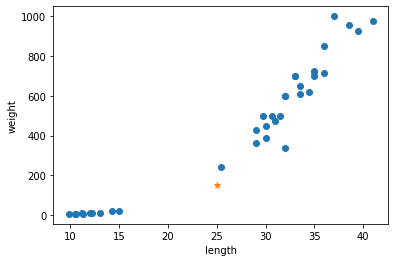

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1]) #length, weight 데이터 추출
plt.scatter(25,150,marker='*') # 수상한 도미 데이터
plt.xlabel('length')
plt.ylabel('weight')
plt.show() # KNN이 * 를 좌측 하단의 데이터로 판단했다 > 도미임에도 빙어로 판단했다. 왜일까

In [ ]:
distances, indexes = kn.kneighbors([[25,150]])

In [ ]:
print(distances)
print(indexes)


[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


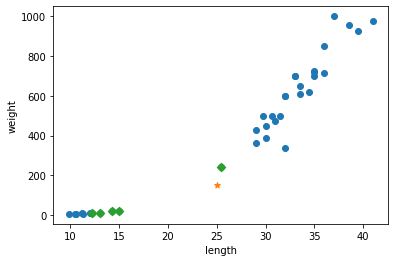

In [ ]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='*')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show() # KNN이 이웃으로 판단한 데이터를 구분지어 그린다

#여전히 직관적으로 납득이 되질않는데 이는 x,y 축의 범위 차이 때문 ~ 스케일이 다르다

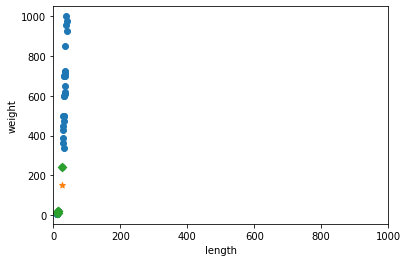

In [ ]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='*')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.xlim(0,1000) # x 축 범위를 동일하게 설정
plt.show() # KNN이 이웃으로 판단한 데이터를 구분지어 그린다

# x값의 차이는 결과에 큰 영향을 미치지 못하고있음을 알 수 있다. 이를 해결하기위해 데이터 전처리가 필요하고 그 중 하나의 방법으로 표준점수를 이용하자 (정규화) 

In [ ]:
mean = np.mean(train_input,axis=0) # [길이,무게] 의 평균 출력
std = np.std(train_input,axis=0) # [길이,무게] 의 표준편차 출력
print(mean,std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [ ]:
print(type(train_input),type(mean),type(std))
train_scaled = (train_input-mean)/std #모두 numpy.ndarray 사이의 연산 ~ 브로드캐스팅
train_scaled

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

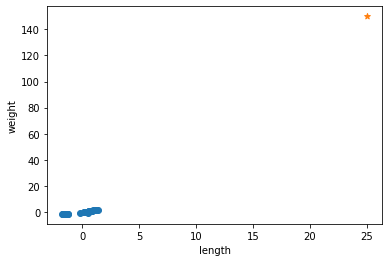

In [ ]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(25,150,marker='*') #[25,150] 데이터를 정규화 안했음!
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

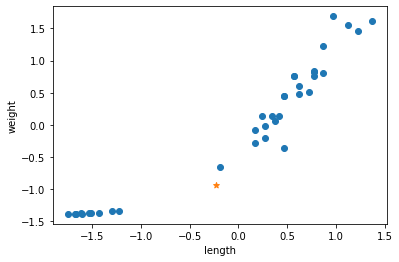

In [ ]:
new = ([25,150]-mean)/std # 수상한 도미의 정규화
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='*') 
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn.fit(train_scaled,train_target)

test_scaled = (test_input - mean) / std #train 의 mean, std 를 적용

kn.score(test_scaled,test_target)

1.0

In [ ]:
kn.predict([new])

array([1.])

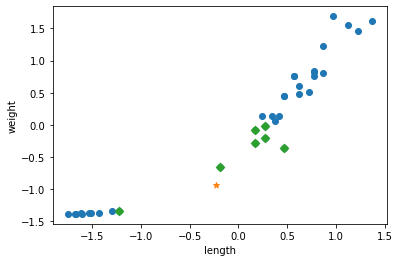

In [ ]:
distances, indexes = kn.kneighbors([new],n_neighbors=7)
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='*')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(distances)
print(indexes)
kn.kneighbors([new])

[[0.2873737  0.7711188  0.89552179 0.91493515 0.95427626 1.05448625
  1.07956368]]
[[21 14 34 32  5 31 33]]


(array([[0.2873737 , 0.7711188 , 0.89552179, 0.91493515, 0.95427626]]),
 array([[21, 14, 34, 32,  5]]))